K=1: Accuracy = 0.71
K=3: Accuracy = 0.69
K=5: Accuracy = 0.69
K=7: Accuracy = 0.73
K=9: Accuracy = 0.73

Best K: 7
Confusion Matrix:
[[15  0  0]
 [ 0 10  5]
 [ 0  7  8]]


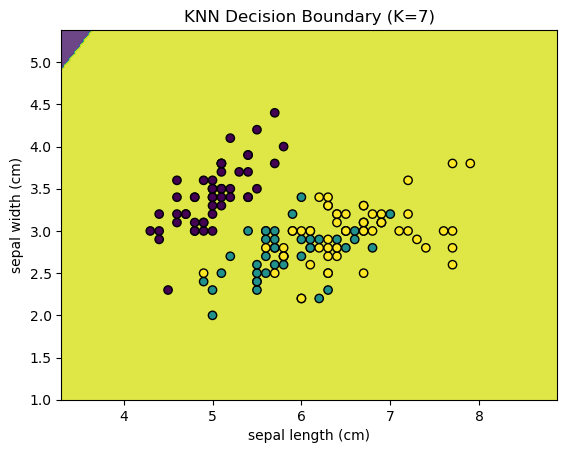

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Select only two features for visualization (e.g., sepal length and width)
X = X[:, :2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Range of K values to experiment
k_values = [1, 3, 5, 7, 9]

best_k = None
best_accuracy = 0

for k in k_values:
    # Instantiate and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = knn.predict(X_test_scaled)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k}: Accuracy = {acc:.2f}")

    # Keep track of the best K
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

# Retrain with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Final predictions and evaluation
y_pred = knn_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

print(f"\nBest K: {best_k}")
print(f"Confusion Matrix:\n{cm}")

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Plot decision boundary with the best model
plot_decision_boundary(knn_best, X, y, f"KNN Decision Boundary (K={best_k})")